In [1]:
import numpy as np
import pandas as pd

In [2]:
#problem4

In [9]:
path = '/Users/Vadim/Desktop/Python/HA3/'
name = 'goalies-2014-2016.csv'

In [16]:
df = pd.read_csv(path+name,sep=';')

In [21]:
#4.1
df[df.columns[:6]].iloc[:5]

,n,player,season,team,position,games_played
0,1,Cam Talbot,2016-17,EDM,G,73
1,2,Braden Holtby,2016-17,WSH,G,63
2,3,Sergei Bobrovsky,2016-17,CBJ,G,63
3,4,Devan Dubnyk,2016-17,MIN,G,65
4,5,Tuukka Rask,2016-17,BOS,G,65


In [30]:
#4.2
abs(df['save_percentage']-df['saves']/df['shots_against']).max()

0.00059325605900950595

In [39]:
#4.3
print(

    ' Averages:\n\n',
    'games_played:',df['games_played'].mean(),'\n',
    'goals_against:',df['goals_against'].mean(),'\n',
    'save_percentage:',df['save_percentage'].mean(),'\n\n',

    'Standard deviations:\n\n',
    'games_played:',df['games_played'].std(),'\n',
    'goals_against:',df['goals_against'].std(),'\n',
    'save_percentage:',df['save_percentage'].std()
    )

 Averages:

 games_played: 28.476702508960575 
 goals_against: 67.60573476702508 
 save_percentage: 0.901179211469534 

 Standard deviations:

 games_played: 22.28539530193931 
 goals_against: 53.351779174596096 
 save_percentage: 0.07126001228217074


In [43]:
#4.4
filt1 = df['season'].isin(['2016-17'])
filt2 = df['games_played']>40
mask = filt1&filt2

In [53]:
best = df.loc[df[mask]['save_percentage'].idxmax()]

In [58]:
print('Goalkeeper with the best save percentage:',best['player'],best['save_percentage'])

Goalkeeper with the best save percentage: Sergei Bobrovsky 0.931


In [62]:
#4.5
res = pd.DataFrame({})
ses = []
name = []
saves = []


for season in df.season.unique():
    mask = df['season'].isin([season])
    iid = df[mask]['saves'].idxmax()
    name.append(df.loc[iid]['player'])
    saves.append(df.loc[iid]['saves'])
    ses.append(season)
res['Name'] = name
res['# of saves'] = saves
res['Season'] = ses

In [63]:
res

,Name,# of saves,Season
0,Cam Talbot,1946,2016-17
1,Henrik Lundqvist,1788,2015-16
2,Braden Holtby,1887,2014-15


In [83]:
#4.6
filt1 = df['wins']>=30
df_4 = df[filt1]

In [84]:
df_4 = df_4.groupby('player').count()
df_4.reset_index(inplace=True,drop=False)

In [88]:
names = df_4['player'][df_4['wins'] ==3]
names

2        Braden Holtby
5       Corey Crawford
7         Devan Dubnyk
9     Henrik Lundqvist
17         Pekka Rinne
21         Tuukka Rask
Name: player, dtype: object

In [93]:
res2 = df[df['player'].isin(names)][['player','wins']].groupby('player').mean()

In [94]:
res2.reset_index(inplace=True,drop=False)

In [96]:
res2.columns = ['Name','Average # of wins within season']

In [97]:
res2

,Name,Average # of wins within season
0,Braden Holtby,43.666667
1,Corey Crawford,33.000000
2,Devan Dubnyk,36.000000
3,Henrik Lundqvist,32.000000
4,Pekka Rinne,35.333333
5,Tuukka Rask,34.000000


In [340]:
#problem 1
X = np.random.randn(100,3)
y = X.dot(np.array([1,2,3]))+np.random.randn(100)
class OLS:
    params = None
    var = None
    vcov = None
    prediction = None
    resid = None
    def fit(X,y):
        betas = ((X.T.dot(X)**(-1)).dot(X.T)).dot(y)
        var = 1/(X.shape[0]-X.shape[1])*((y-X.dot(betas))).T.dot(y-X.dot(betas))
        vcov = var*(X.T.dot(X))**(-1)
        resid = y-X.dot(betas)
        OLS.params = betas
        OLS.var = var
        OLS.vcov = vcov
        OLS.resid = resid
    def predict(x=None):
        if x.shape == X.shape:
            prtd = x.dot(OLS.params)
            OLS.prediction = prtd
            return prtd
        else:
            print('Error')

In [342]:
OLS.fit(X,y)

In [343]:
OLS.params

array([ -79.92220304, -164.07207338,  -47.53876774])

In [336]:
OLS.vcov

array([[   402.29585698, -21613.42366854,   4851.90957697],
       [-21613.42366854,    365.47503762, -12603.30257207],
       [  4851.90957697, -12603.30257207,    425.7069432 ]])

In [344]:
OLS.resid

array([  1.12198549e+02,  -1.94292479e+02,  -1.64044696e+02,
        -1.67209173e+02,  -3.51171991e+02,  -1.55119283e+02,
         4.26530969e+02,  -9.13354287e+01,  -1.95725457e+02,
        -1.66349383e+02,  -7.25015952e+01,  -5.98684520e+01,
         3.91550077e+02,   6.46309751e+01,   4.07602441e+02,
        -7.73171129e+01,   1.69169647e+01,   1.12647937e+02,
         7.87212745e+01,  -2.83154092e+02,   1.63497266e+02,
        -3.60344281e-01,   1.20235666e+02,  -3.76576817e+02,
        -2.70198979e+02,  -3.12829798e+02,   6.22294299e+01,
         1.57068878e+02,   3.72539148e+02,   2.75886869e+02,
        -3.05546863e+01,   1.34906350e+02,  -3.57293902e+00,
        -3.21863275e+02,   1.56025037e+01,  -5.94699368e+01,
        -9.12781116e+01,   2.70421784e+01,  -7.82074723e+01,
         2.12460966e+02,  -2.13383178e+02,  -3.95105713e+02,
         1.02320848e+02,  -2.04304370e+02,   5.20922019e+01,
        -1.05268197e+02,   1.17206088e+02,   2.23521575e+02,
         1.39896147e+02,

In [345]:
OLS.predict(X)

array([-115.72765198,  190.09500709,  161.62390791,  162.07501143,
        343.93705576,  151.98598681, -421.55879349,   89.0446991 ,
        196.44577716,  166.89481984,   71.49869586,   65.00850369,
       -388.53945423,  -61.32903878, -402.85890291,   77.57029085,
        -15.31492967, -107.16008899,  -77.91103026,  280.12161699,
       -158.42716325,    1.20428185, -121.41828778,  369.47102271,
        263.81547623,  308.0128201 ,  -60.50389319, -149.61713489,
       -368.82320767, -265.17193343,   29.5248254 , -134.01115404,
          5.5622202 ,  314.90591436,  -15.92696542,   57.69664959,
         86.93777553,  -29.86306366,   77.36650957, -211.70979435,
        208.6510919 ,  392.39964656,  -96.24993261,  201.11204283,
        -50.20537931,  103.56362288, -111.316377  , -223.98112021,
       -134.21059341,  -81.81847984,   29.99113874,    5.86027325,
       -281.47693276,  261.29281787,   71.98504849, -105.07405777,
        -83.98045261,   78.98385344,  159.06316843, -567.35945

In [346]:
#problem2

In [693]:
bets = np.random.rand(1,10)

In [705]:
def factorial(x):
    if x == 0:
        return 1
    else:
        return x * factorial(x - 1)

In [710]:
x = []
u = []
y = []
for i in range(100+1):
    x_raw = np.random.uniform(-5,5)
    u_raw = np.random.normal(0,100)
    y_raw = []
    k = 0
    while k <10:
        y_raw.append(bets[0][k]*(x_raw**k)/factorial(k)+u_raw)
        k+=1
    x.append(x_raw)
    u.append(u_raw)
    y.append(sum(y_raw))
x = np.array(x)
u = np.array(u)
y = np.array(y)

In [713]:
import matplotlib.pyplot as plt

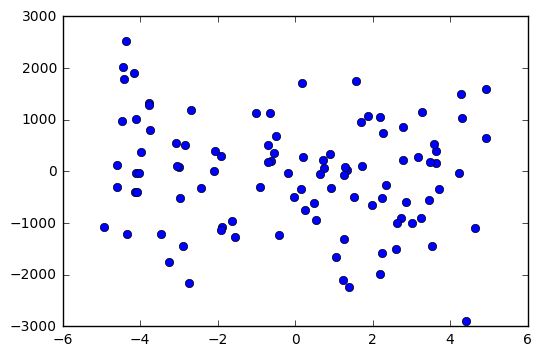

In [729]:
plt.plot(x,y,'bo')
plt.show()

In [740]:
x = np.vstack(x**3)
y = np.vstack(y)

In [741]:
OLS.fit(x,y)

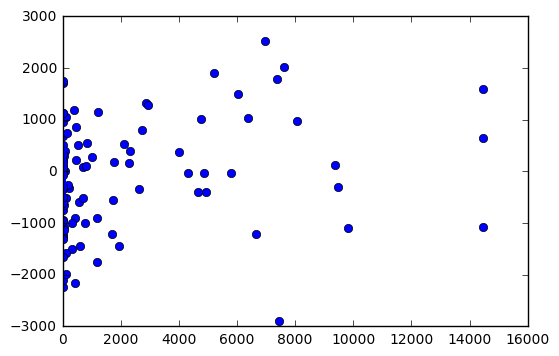

In [742]:
plt.plot(x,y,'bo')
plt.plot(OLS.prediction)
plt.show()